# Supervised Descent Method - Basics
The aim of this notebook is to showcase how one can build and fit SDMs to images using `Menpo`.

Note that this notebook assumes that the user has previously gone through the AAMs Basics notebook and he/she is already familiar with the basics of `Menpo`'s Deformable Model Fitting framework explained in there.

## 1. Loading data

In this notebook, we will use the training and test sets of the LFPW database for the training and fitting SDMs.

Note that the necessary steps required for acquiring the LFPW database are explained in detail in the AAMs Basics notebook and the user is simply referred to that notebook for this matter.

In [1]:
%matplotlib inline
from pathlib import Path


path_to_lfpw = Path('/vol/atlas/databases/lfpw')
path_to_lfpw = Path('/Users/pts08/data/lfpw')

In [2]:
import menpo.io as mio

training_images = []
# load landmarked images
for i in mio.import_images(path_to_lfpw / 'trainset' / '*', verbose=True):
    # crop image
    i = i.crop_to_landmarks_proportion(0.1)
    # convert it to grayscale if needed
    if i.n_channels == 3:
        i = i.as_greyscale(mode='luminosity')
    # append it to the list
    training_images.append(i)

Importing assets: [==========] 100% (811/811) - done.                           


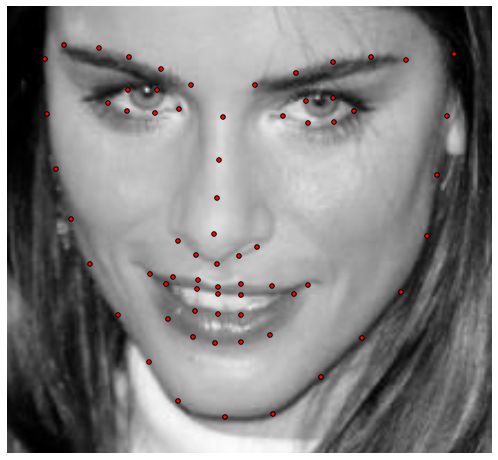

In [3]:
from menpowidgets import visualize_images

visualize_images(training_images)

## 2. Train a SDM with default parameters

Trainign an SDM using `Menpo` is rather straight forward and can be done using a single line of code.
As expected, the SDM training takes some time.

In [4]:
from menpofit.sdm import RegularizedSDM
# Note that we use fast dense sift features
# and thus cyvlfeat must be installed (use conda)
from menpo.feature import vector_128_dsift

fitter = RegularizedSDM(
    training_images, 
    verbose=True,
    group='PTS',
    diagonal=200,
    n_perturbations=30,
    n_iterations=2,
    patch_features=vector_128_dsift,
    patch_shape=(24, 24),
    alpha=10
)

- Computing reference shape                                                     Computing batch 0
- Generating 30 new bounding boxes directly from the ground truth shape: [==========] 100% (811/811) - done.
  - Scale 0: (Iteration 0) - Training error -> mean: 0.0137, std: 0.0045, median: 0.0129.
  - Scale 1: (Iteration 0) - Training error -> mean: 0.0042, std: 0.0007, median: 0.0041.


In [5]:
print(fitter)

Supervised Descent Method
 - Regression performed using the list algorithm
   - Regression class: IRLRegression
 - Perturbations generated per shape: 30
 - Images scaled to diagonal: 200.00
 - Custom perturbation scheme used: False
 - Scales: [0.5, 1.0]
  - Scale 0.5
   - 1 iterations
   - Patch shape: (24, 24)
   - Holistic feature: no_op
   - Patch feature: vector_128_dsift
  - Scale 1.0
   - 1 iterations
   - Patch shape: (24, 24)
   - Holistic feature: no_op
   - Patch feature: vector_128_dsift



## 3. Fit the previous SDM

Let's try fitting the SDM to some images of the LFPW database test set!!!

In [6]:
import menpo.io as mio

# load test images
test_images = []
for i in mio.import_images(path_to_lfpw / 'testset' / '*.png', max_images=5, verbose=True):
    # crop image
    i = i.crop_to_landmarks_proportion(0.5)
    # convert it to grayscale if needed
    if i.n_channels == 3:
        i = i.as_greyscale(mode='luminosity')
    # append it to the list
    test_images.append(i)

Importing assets: [==========] 100% (5/5) - done.                               


Note that for the purpose of this simple fitting demonstration we will just fit the first 5 images of the LFPW test set.

Fitting a SDM to an image is as simple as calling its `fit` method:

In [7]:
fitting_results = []

for i in test_images:
    gt_s = i.landmarks['PTS'].lms
    # generate perturbed landmarks
    bb = fitter.perturb_from_gt_bb(gt_s.bounding_box())
    # fit image
    fr = fitter.fit_from_bb(i, bb, gt_shape=gt_s) 
    fitting_results.append(fr)

    # print fitting error
    print(fr)

Initial error: 0.1291
Final error: 0.0245
Initial error: 0.0851
Final error: 0.0181
Initial error: 0.0852
Final error: 0.0526
Initial error: 0.1005
Final error: 0.0388
Initial error: 0.1241
Final error: 0.0547


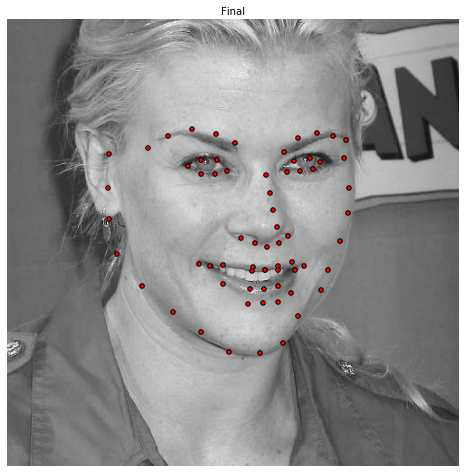

In [8]:
from menpowidgets import visualize_fitting_result

visualize_fitting_result(fitting_results)